In [2]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from matplotlib import pyplot as plt
import plotly.express as px
import networkx as nx
import plotly.graph_objects as go

In [3]:
df = pd.read_csv('combined_data_with_extra_data2.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Run ID,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,ERR1075960,Male,0.0,United States of America,21.22,Health,0.034320,0.320964,0.005633,0.013763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERR1854747,Male,62.0,United Kingdom,28.70,Health,0.038577,0.204173,0.014874,0.008240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERR688529,Male,63.0,Austria,30.90,Health,0.086423,0.066411,0.026879,0.069596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERR1316059,Male,67.0,United States of America,22.15,Health,0.096800,0.233068,0.009989,0.015105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR5649200,Male,27.0,United States of America,20.80,Health,0.083754,0.196804,0.058733,0.039295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df[df['Condition'] == 'Schizophrenia']

,Run ID,Sex,Age,Country,BMI,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
1546,SRR18576085,male,0.0,0,0.0,Schizophrenia,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1547,SRR18576086,male,0.0,0,0.0,Schizophrenia,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1548,SRR18576087,male,0.0,0,0.0,Schizophrenia,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1549,SRR18576088,male,0.0,0,0.0,Schizophrenia,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1550,SRR18576089,male,0.0,0,0.0,Schizophrenia,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1551,SRR18576090,male,0.0,0,0.0,Schizophrenia,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1552,SRR18576091,male,0.0,0,0.0,Schizophrenia,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1553,SRR18576092,male,0.0,0,0.0,Schizophrenia,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1554,SRR18576093,male,0.0,0,0.0,Schizophrenia,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1555,SRR18576094,male,0.0,0,0.0,Schizophrenia,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0


In [4]:
df = df.drop(['Run ID', 'Sex', 'Age', 'Country', 'BMI', 'Unknown', 'Uncultured Organism'], axis=1)

In [5]:
df.loc[1639]

Condition                 Bipolar Disorder
Alistipes                              0.0
Bacteroides                            0.0
Bifidobacterium                        0.0
Blautia                                0.0
Clostridium                            0.0
Dorea                                  0.0
Eubacterium                            0.1
Faecalibacterium                       0.0
Oscillibacter                         0.04
Parabacteroides                        0.0
Roseburia                              0.0
Ruminococcus                           0.0
Coprococcus                            0.0
Lachnospira                            0.0
Oscillospira                           0.0
Subdoligranulum                        0.0
Sutterella                             0.0
Anaerostipes                           0.0
Streptococcus                          0.0
Akkermansia                            0.0
Anaerofilum                            0.0
Anaerotruncus                          0.0
Bacillus   

In [6]:
df1 = df.loc[df.select_dtypes(include='number').sum(axis=1) != 0]

In [7]:
df1

,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,Health,0.034320,0.320964,0.005633,0.013763,0.003310,0.000639,0.008188,0.114460,0.013821,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Health,0.038577,0.204173,0.014874,0.008240,0.001926,0.000803,0.018299,0.072713,0.043660,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Health,0.086423,0.066411,0.026879,0.069596,0.082330,0.043767,0.257382,0.176202,0.003111,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Health,0.096800,0.233068,0.009989,0.015105,0.003086,0.000162,0.004142,0.227871,0.058226,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Health,0.083754,0.196804,0.058733,0.039295,0.001121,0.002173,0.016073,0.018269,0.006331,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.040000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,Health,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,Bipolar Disorder,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
numeric_cols = df1.select_dtypes(include='number').columns 
df1[numeric_cols] = df1[numeric_cols].div(df1[numeric_cols].sum(axis=1), axis=0)
# recalculating the relative abundances after dropped unknown and uncultured organism clumns 

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_90851/3310862650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[numeric_cols] = df1[numeric_cols].div(df1[numeric_cols].sum(axis=1), axis=0)


In [9]:
df1

,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,Health,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,0.209882,0.025343,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Health,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,0.162969,0.097854,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Health,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,0.176429,0.003115,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Health,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,0.326507,0.083430,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Health,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,0.035214,0.012203,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.285714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,Health,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1642,Bipolar Disorder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1643,Bipolar Disorder,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df1.loc[1639]

Condition                 Bipolar Disorder
Alistipes                              0.0
Bacteroides                            0.0
Bifidobacterium                        0.0
Blautia                                0.0
Clostridium                            0.0
Dorea                                  0.0
Eubacterium                       0.714286
Faecalibacterium                       0.0
Oscillibacter                     0.285714
Parabacteroides                        0.0
Roseburia                              0.0
Ruminococcus                           0.0
Coprococcus                            0.0
Lachnospira                            0.0
Oscillospira                           0.0
Subdoligranulum                        0.0
Sutterella                             0.0
Anaerostipes                           0.0
Streptococcus                          0.0
Akkermansia                            0.0
Anaerofilum                            0.0
Anaerotruncus                          0.0
Bacillus   

In [11]:
# df2 = df1
# numeric_rows = df2.select_dtypes(include='number').index 
# numeric_rows
df_numeric = df1

In [12]:
df2 = df1
numeric_cols = df2.select_dtypes(include='number').columns 
df2[numeric_cols] = df2[numeric_cols].apply(lambda col: np.where(col > 0, col.name, 0))
df2

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_90851/938119418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[numeric_cols] = df2[numeric_cols].apply(lambda col: np.where(col > 0, col.name, 0))


,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
1,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
2,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
3,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
4,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,Bipolar Disorder,0,0,0,0,0,0,Eubacterium,0,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
1640,Health,0,Bacteroides,0,0,0,0,0,0,0,...,0,Paraprevotella,0,0,0,0,0,0,0,0
1642,Bipolar Disorder,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1643,Bipolar Disorder,0,Bacteroides,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df2.loc[1639]

Condition                 Bipolar Disorder
Alistipes                                0
Bacteroides                              0
Bifidobacterium                          0
Blautia                                  0
Clostridium                              0
Dorea                                    0
Eubacterium                    Eubacterium
Faecalibacterium                         0
Oscillibacter                Oscillibacter
Parabacteroides                          0
Roseburia                                0
Ruminococcus                             0
Coprococcus                              0
Lachnospira                              0
Oscillospira                             0
Subdoligranulum                          0
Sutterella                               0
Anaerostipes                             0
Streptococcus                            0
Akkermansia                              0
Anaerofilum                              0
Anaerotruncus                            0
Bacillus   

In [14]:
df2.columns = range(1, len(df.columns) + 1)

In [15]:
df2

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
0,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
1,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
2,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
3,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
4,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,Bipolar Disorder,0,0,0,0,0,0,Eubacterium,0,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
1640,Health,0,Bacteroides,0,0,0,0,0,0,0,...,0,Paraprevotella,0,0,0,0,0,0,0,0
1642,Bipolar Disorder,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1643,Bipolar Disorder,0,Bacteroides,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df2.replace("0", pd.NA, inplace=True)
df_cleaned_list = df2.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_90851/2091969405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace("0", pd.NA, inplace=True)


In [17]:
df_cleaned = pd.DataFrame(df_cleaned_list)
df_cleaned.fillna('').replace('None', '', inplace=True)

In [18]:
df_cleaned

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,None,None,None,None,None,None,None,None,None,None
1,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,None,None,None,None,None,None,None,None,None,None
2,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,None,None,None,None,None,None,None,None,None,None
3,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,None,None,None,None,None,None,None,None,None,None
4,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,Bipolar Disorder,Eubacterium,Oscillibacter,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1604,Health,Bacteroides,Paraprevotella,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1605,Bipolar Disorder,Odoribacter,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1606,Bipolar Disorder,Bacteroides,Prevotella,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [19]:
df[df.iloc[:, 0] == 'Schizophrenia']

,Condition,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
1546,Schizophrenia,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.120000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1547,Schizophrenia,0.0,0.0,0.0,0.000000,0.020000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1548,Schizophrenia,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1549,Schizophrenia,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.020408,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1550,Schizophrenia,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1551,Schizophrenia,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1552,Schizophrenia,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1553,Schizophrenia,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1554,Schizophrenia,0.0,0.0,0.0,0.000000,0.060000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0
1555,Schizophrenia,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0


In [20]:
#df_cleaned.to_csv('col_names_trans_data.csv', index=False)
#df_cleaned.to_excel('col_names_trans_data.xlsx', index=False)

In [21]:
newdf = pd.read_csv('col_names_trans_data(Sheet1)id.csv')
newdf.fillna(0, inplace=True)
newdf = newdf.drop(['ID'], axis=1)
newdf

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
1,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
2,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
3,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
4,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,Bipolar Disorder,Eubacterium,Oscillibacter,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1604,Health,Bacteroides,Paraprevotella,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1605,Bipolar Disorder,Odoribacter,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1606,Bipolar Disorder,Bacteroides,Prevotella,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
newdf_list = newdf.values.tolist()
newdf_list_transp = newdf.apply(lambda row: row.tolist(), axis=1)
newdf_list_transp.head()

0    [Health, Alistipes, Bacteroides, Bifidobacteri...
1    [Health, Alistipes, Bacteroides, Bifidobacteri...
2    [Health, Alistipes, Bacteroides, Bifidobacteri...
3    [Health, Alistipes, Bacteroides, Bifidobacteri...
4    [Health, Alistipes, Bacteroides, Bifidobacteri...
dtype: object

In [23]:
items = set()
for col in newdf:
    items.update(newdf[col].unique())
print(items)

{0, 'Anaerostipes', 'Tidjanibacter', 'Epilepsy', 'Ruminiclostridium', 'Anaerobutyricum', 'Akkermansia', 'Bipolar Disorder, Depression, Epilepsy, Schizophrenia', 'Health', 'Bifidobacterium', 'Oscillibacter', 'Ruminococcaceae', 'Acinetobacter', 'Intestinibacter', 'Ruminococcus', 'Holdemania', 'Lachnoclostridium', 'Lactobacillus', 'Schizophrenia', 'Phocaeicola', 'Eubacterium', 'Agathobacter', 'Clostridium', 'Anaerofilum', 'Anaerotruncus', 'Depression', 'Ligilactobacillus', 'Escherichia', 'Flavonifractor', 'Lachnospira', 'Sutterella', 'Eggerthella', 'Desulfovibrio', 'Roseburia', 'Parabacteroides', 'Alzheimers', 'Odoribacter', 'Mediterraneibacter', 'Blautia', 'Barnesiella', 'Coprococcus', 'Bacteroides', 'Collinsella', 'Faecalibacterium', 'Oscillospira', 'Paraprevotella', 'Erysipelatoclostridium', 'Bipolar Disorder, Depression, Schizophrenia', 'Veillonella', 'Bipolar Disorder', 'Parkinsons', 'Sporobacter', 'Subdoligranulum', 'Prevotella', 'Parasutterella', 'Bacillus', 'Alistipes', 'Streptoco

In [48]:
itemset = set(items)
encoded_vals = []
for index, row in newdf.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

# ohe -> One-Hot-Encoded
ohe_df = pd.DataFrame(encoded_vals).drop(columns=0)
ohe_df.loc[1600][ohe_df.loc[1600] == 1]


Bipolar Disorder    1
Roseburia           1
Blautia             1
Name: 1600, dtype: int64

In [70]:
freq_items = apriori(ohe_df, min_support=0.01, use_colnames=True, verbose=1, max_len=2)

rules = association_rules(freq_items, metric="confidence", min_threshold=0.7)

target_conditions = {'Health', 'Parkinsons', 'Depression', 'Schizophrenia', 'Bipolar Disorder', 'Alzheimers', 
                    'Epilepsy'}

filtered_rules = rules[
    rules['antecedents'].apply(lambda x: any(item in target_conditions for item in x)) |
    rules['consequents'].apply(lambda x: any(item in target_conditions for item in x))
]


print("The number of filtered rules produced is: ", len(filtered_rules))
filtered_rules


Processing 2352 combinations | Sampling itemset size 2
The number of filtered rules produced is:  61


/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(Epilepsy),(Akkermansia),0.021766,0.628109,0.019279,0.885714,1.410127,0.005607,3.254042,0.297316
10,(Epilepsy),(Holdemania),0.021766,0.605721,0.016791,0.771429,1.273570,0.003607,1.724969,0.219585
11,(Epilepsy),(Lachnoclostridium),0.021766,0.731343,0.021144,0.971429,1.328280,0.005226,9.402985,0.252646
12,(Epilepsy),(Lactobacillus),0.021766,0.568408,0.019279,0.885714,1.558237,0.006907,3.776430,0.366220
13,(Eggerthella),(Epilepsy),0.011194,0.021766,0.010572,0.944444,43.390476,0.010328,17.608209,0.988013
...,...,...,...,...,...,...,...,...,...,...
918,(Health),(Alistipes),0.120647,0.854478,0.092662,0.768041,0.898843,-0.010428,0.627363,-0.113461
919,(Health),(Oscillibacter),0.120647,0.802861,0.087065,0.721649,0.898848,-0.009798,0.708241,-0.113456
920,(Health),(Bacteroides),0.120647,0.935945,0.108209,0.896907,0.958290,-0.004710,0.621331,-0.047162
921,(Health),(Dorea),0.120647,0.781716,0.089552,0.742268,0.949536,-0.004759,0.846940,-0.056993


In [71]:
freq_items

,support,itemsets
0,0.034826,(Anaerostipes)
1,0.021766,(Epilepsy)
2,0.171020,(Ruminiclostridium)
3,0.628109,(Akkermansia)
4,0.017413,"(Bipolar Disorder, Depression, Epilepsy, Schiz..."
...,...,...
751,0.687189,"(Oscillibacter, Dorea)"
752,0.766791,"(Oscillibacter, Ruminococcus)"
753,0.776741,"(Dorea, Bacteroides)"
754,0.868781,"(Ruminococcus, Bacteroides)"


In [72]:
rules_disorder_to_bacteria = rules[
    rules['consequents'].apply(lambda x: 'Parkinsons' in x)  # Replace with your disorder
]
print(rules_disorder_to_bacteria)


           antecedents   consequents  antecedent support  consequent support  \
374      (Lachnospira)  (Parkinsons)            0.042289             0.04602   
389       (Sutterella)  (Parkinsons)            0.040423             0.04602   
561     (Oscillospira)  (Parkinsons)            0.046020             0.04602   
641  (Subdoligranulum)  (Parkinsons)            0.043532             0.04602   

      support  confidence      lift  leverage  conviction  zhangs_metric  
374  0.042289         1.0  21.72973  0.040342         inf       0.996104  
389  0.040423         1.0  21.72973  0.038563         inf       0.994167  
561  0.046020         1.0  21.72973  0.043902         inf       1.000000  
641  0.043532         1.0  21.72973  0.041529         inf       0.997399  


In [73]:
unique_items = set()
for index, row in rules.iterrows():
    unique_items.update(row['antecedents'])
    unique_items.update(row['consequents'])

print(unique_items)  # Look for how Parkinson’s is named


{'Anaerostipes', 'Epilepsy', 'Ruminiclostridium', 'Akkermansia', 'Bipolar Disorder, Depression, Epilepsy, Schizophrenia', 'Bifidobacterium', 'Oscillibacter', 'Health', 'Intestinibacter', 'Ruminococcus', 'Holdemania', 'Lachnoclostridium', 'Lactobacillus', 'Phocaeicola', 'Eubacterium', 'Clostridium', 'Anaerofilum', 'Anaerotruncus', 'Lachnospira', 'Eggerthella', 'Sutterella', 'Desulfovibrio', 'Roseburia', 'Parabacteroides', 'Alzheimers', 'Odoribacter', 'Blautia', 'Barnesiella', 'Coprococcus', 'Bacteroides', 'Faecalibacterium', 'Oscillospira', 'Erysipelatoclostridium', 'Bipolar Disorder, Depression, Schizophrenia', 'Bipolar Disorder', 'Parkinsons', 'Sporobacter', 'Subdoligranulum', 'Prevotella', 'Parasutterella', 'Bacillus', 'Alistipes', 'Streptococcus', 'Corynebacterium', 'Dorea', 'Pseudomonas', 'Dialister'}


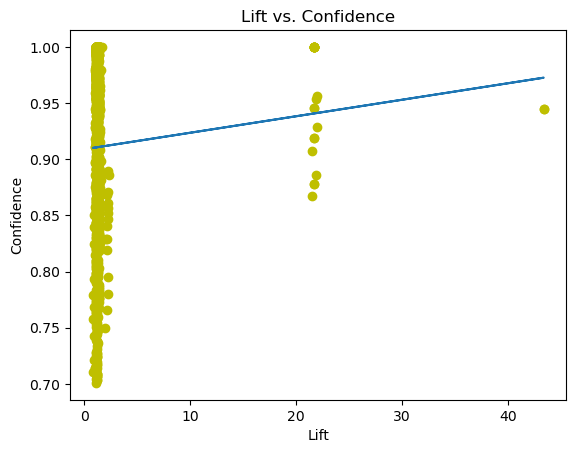

In [74]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
 fit_fn(rules['lift']))
plt.title('Lift vs. Confidence')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.show()

In [75]:
# doing this because plotly cannot serialize frozensets 
rules["antecedents"] = rules["antecedents"].apply(lambda x: ", ".join(sorted(x)))
rules["consequents"] = rules["consequents"].apply(lambda x: ", ".join(sorted(x)))

fig = px.scatter(rules, 
                 x="support", 
                 y="confidence", 
                 size="lift", 
                 color="lift",
                 hover_data=["antecedents", "consequents"],
                 title="Support vs Confidence (Bubble Size = Lift)")
fig.show()


In [76]:
# import networkx as nx
# import plotly.graph_objects as go

# # Create a directed graph
# G = nx.DiGraph()

# # Add edges
# for _, row in rules.iterrows():
#     G.add_edge(", ".join(row["antecedents"]), ", ".join(row["consequents"]), weight=row["lift"])

# # Get positions
# pos = nx.spring_layout(G, k=0.5)

# # Create edge traces
# edge_x, edge_y = [], []
# for edge in G.edges(data=True):
#     x0, y0 = pos[edge[0]]
#     x1, y1 = pos[edge[1]]
#     edge_x.extend([x0, x1, None])
#     edge_y.extend([y0, y1, None])

# edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=1, color='#888'),
#                          hoverinfo='none', mode='lines')

# # Create node traces
# node_x, node_y, text = [], [], []
# for node in G.nodes():
#     x, y = pos[node]
#     node_x.append(x)
#     node_y.append(y)
#     text.append(node)

# node_trace = go.Scatter(x=node_x, y=node_y, mode='markers+text', 
#                         marker=dict(size=10, color='lightblue'),
#                         text=text, hoverinfo="text")

# # Create figure
# fig = go.Figure(data=[edge_trace, node_trace])
# fig.update_layout(showlegend=False, title="Association Rule Network Graph")
# fig.show()
